In [3]:
from sklearn.datasets import fetch_20newsgroups

In [4]:
fetch_20newsgroups

<function sklearn.datasets._twenty_newsgroups.fetch_20newsgroups(*, data_home=None, subset='train', categories=None, shuffle=True, random_state=42, remove=(), download_if_missing=True, return_X_y=False)>

In [7]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space', 'comp.sys.ibm.pc.hardware', 'sci.crypt']
categories

['alt.atheism',
 'talk.religion.misc',
 'comp.graphics',
 'sci.space',
 'comp.sys.ibm.pc.hardware',
 'sci.crypt']

In [9]:
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

In [10]:
newsgroups_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.sys.ibm.pc.hardware',
 'sci.crypt',
 'sci.space',
 'talk.religion.misc']

In [11]:
newsgroups_train.target

array([0, 4, 2, ..., 3, 1, 0], dtype=int64)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv = CountVectorizer(token_pattern="[\w']{3,}", stop_words='english', max_features=2000, min_df=5, max_df=0.5)

In [14]:
cv

CountVectorizer(max_df=0.5, max_features=2000, min_df=5, stop_words='english',
                token_pattern="[\\w']{3,}")

In [18]:
review_cv = cv.fit_transform(newsgroups_train.data)
review_cv

<3219x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 191709 stored elements in Compressed Sparse Row format>

In [19]:
review_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [20]:
from sklearn.decomposition import LatentDirichletAllocation

In [21]:
import numpy as np

In [23]:
np.set_printoptions(precision=3)

In [55]:
lda = LatentDirichletAllocation(n_components=8,
max_iter=5,
topic_word_prior=0.1,
doc_topic_prior=1.0,
learning_method='online',
n_jobs=-1,
random_state=0
)

In [56]:
lda

LatentDirichletAllocation(doc_topic_prior=1.0, learning_method='online',
                          max_iter=5, n_components=8, n_jobs=-1, random_state=0,
                          topic_word_prior=0.1)

In [57]:
review_topics = lda.fit_transform(review_cv)
review_topics

array([[0.916, 0.007, 0.03 , ..., 0.008, 0.008, 0.008],
       [0.073, 0.077, 0.374, ..., 0.043, 0.041, 0.175],
       [0.031, 0.023, 0.052, ..., 0.062, 0.077, 0.667],
       ...,
       [0.038, 0.043, 0.043, ..., 0.039, 0.048, 0.037],
       [0.021, 0.465, 0.029, ..., 0.289, 0.021, 0.091],
       [0.436, 0.012, 0.017, ..., 0.012, 0.013, 0.012]])

In [58]:
review_topics.shape

(3219, 8)

In [59]:
review_topics[0]

array([0.916, 0.007, 0.03 , 0.017, 0.007, 0.008, 0.008, 0.008])

In [60]:
np.mean(review_topics, axis=0)

array([0.103, 0.099, 0.13 , 0.178, 0.139, 0.179, 0.09 , 0.081])

In [61]:
lda.components_.shape

(8, 2000)

In [62]:
lda.components_.shape

(8, 2000)

In [63]:
lda.components_[0]

array([0.94 , 0.139, 0.459, ..., 0.104, 0.102, 0.101])

In [64]:
for idx, document in enumerate(lda.components_):
    print(idx)
    print([cv.get_feature_names_out()[i] for i in -document.argsort()[:-11:-1]])

0
['site', 'unable', 'machine', 'ibm', 'begin', 'compression', 'create', 'study', 'guide', 'range']
1
['old', 'modern', 'plan', 'pay', 'plaintext', 'jumpers', 'close', 'took', 'appreciated', 'max']
2
['ciphers', 'site', 'unable', 'willing', 'likely', 'ide', 'quantum', 'gods', 'launched', '1993apr5']
3
['orbiter', 'freedom', 'range', 'magazine', 'maps', 'begin', 'couple', 'theory', 'looked', 'reach']
4
['low', 'proton', 'solid', 'spencer', 'site', 'ontario', 'loving', 'appreciated', 'contains', 'effective']
5
['hardly', 'multiple', 'site', 'facility', 'areas', 'conversion', 'unable', 'looked', 'magazine', 'bell']
6
['ciphers', 'holland', 'open', 'statement', 'areas', 'words', 'deleted', 'robert', "you're", 'correct']
7
['quoted', 'site', 'recall', 'non', 'second', 'quicktime', 'ram', 'event', 'story', 'bought']


'anon'

In [52]:
#7.2.3

In [53]:
import matplotlib.pyplot as plt

In [54]:
lda.perplexity(review_cv)

953.0460843666867

n_components: 6, perplexity: 1058.260
n_components: 7, perplexity: 1055.111
n_components: 8, perplexity: 1018.328
n_components: 9, perplexity: 1017.749
n_components: 10, perplexity: 1028.686
n_components: 11, perplexity: 1033.398
n_components: 12, perplexity: 1032.112
n_components: 13, perplexity: 1038.642
n_components: 14, perplexity: 1038.627
n_components: 15, perplexity: 1044.712


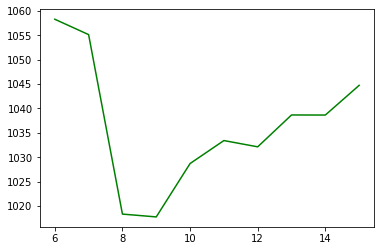

n_components with minimum perplexity: 9


In [69]:
def show_perplexity(cv, start=10, end=30, max_iter=5, topic_word_prior= 0.1, 
                    doc_topic_prior=1.0):
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i, max_iter=max_iter, 
                                        topic_word_prior= topic_word_prior, 
                                        doc_topic_prior=doc_topic_prior,
                                        learning_method='batch', n_jobs= -1,
                                        random_state=7)    
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components: {i}, perplexity: {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value))

print("n_components with minimum perplexity:",
      show_perplexity(review_cv, start=6, end=15))

In [65]:
#gensim

In [67]:
!pip3 install gensim

  Using cached gensim-4.2.0-cp310-cp310-win_amd64.whl (23.9 MB)


In [68]:
from gensim.corpora.dictionary import Dictionary

In [70]:
# 필요한 library들을 import
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

cachedStopWords = stopwords.words("english")

RegTok = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

def tokenizer(text):
    tokens = RegTok.tokenize(text.lower()) 
    # stopwords 제외
    words = [word for word in tokens if (word not in english_stops) and len(word) > 2]
    return words

texts = [tokenizer(news) for news in newsgroups_train.data]

In [71]:
from gensim.corpora.dictionary import Dictionary

# 토큰화 결과로부터 dictionay 생성
dictionary = Dictionary(texts)
print('#Number of initial unique words in documents:', len(dictionary))

# 문서 빈도수가 너무 적거나 높은 단어를 필터링하고 특성을 단어의 빈도 순으로 선택
dictionary.filter_extremes(keep_n=2000, no_below=5, no_above=0.5)
print('#Number of unique words after removing rare and common words:', len(dictionary))

# 카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print('#Number of unique tokens: %d' % len(dictionary))
print('#Number of documents: %d' % len(corpus))

#Number of initial unique words in documents: 46466
#Number of unique words after removing rare and common words: 2000
#Number of unique tokens: 2000
#Number of documents: 3219


In [72]:
from gensim.models import LdaModel

num_topics = 10
passes = 5
%time model = LdaModel(corpus=corpus, id2word=dictionary,\
                       passes=passes, num_topics=num_topics, \
                       random_state=7)

CPU times: total: 10.1 s
Wall time: 10.4 s


In [73]:
model.print_topics(num_words=10)


[(0,
  '0.023*"com" + 0.018*"keith" + 0.016*"caltech" + 0.013*"sgi" + 0.013*"nntp" + 0.013*"posting" + 0.013*"host" + 0.012*"would" + 0.012*"system" + 0.011*"livesey"'),
 (1,
  '0.020*"morality" + 0.018*"objective" + 0.015*"one" + 0.015*"say" + 0.014*"uiuc" + 0.012*"frank" + 0.012*"values" + 0.010*"faq" + 0.010*"article" + 0.008*"cso"'),
 (2,
  '0.026*"com" + 0.025*"access" + 0.025*"posting" + 0.023*"host" + 0.023*"nntp" + 0.017*"digex" + 0.015*"article" + 0.013*"cwru" + 0.013*"___" + 0.013*"net"'),
 (3,
  '0.021*"university" + 0.017*"posting" + 0.015*"host" + 0.015*"nntp" + 0.013*"article" + 0.010*"com" + 0.009*"know" + 0.009*"i\'m" + 0.009*"would" + 0.009*"thanks"'),
 (4,
  '0.032*"com" + 0.015*"would" + 0.011*"article" + 0.010*"one" + 0.010*"get" + 0.009*"people" + 0.009*"ibm" + 0.008*"government" + 0.007*"good" + 0.007*"i\'m"'),
 (5,
  '0.025*"key" + 0.017*"encryption" + 0.014*"clipper" + 0.014*"chip" + 0.009*"keys" + 0.009*"use" + 0.008*"security" + 0.008*"government" + 0.008*"pub

In [74]:
print("#topic distribution of the first document: ", model.get_document_topics(corpus)[0])


#topic distribution of the first document:  [(0, 0.72576934), (8, 0.2699505)]


In [77]:
!pip3 install pyldavis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached numexpr-2.8.3-cp310-cp310-win_amd64.whl (92 kB)


In [78]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(model, corpus, dictionary)
lda_viz

c:\Python310\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
c:\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.137200  0.040249       1        1  22.655416
5      0.065990  0.123620       2        1  14.522776
9      0.072133  0.092872       3        1  12.987437
7      0.138320  0.043609       4        1  11.020437
4     -0.021828  0.007495       5        1   9.298365
6      0.072783 -0.094709       6        1   9.118869
3      0.027374 -0.054949       7        1   8.494165
0     -0.040786 -0.129974       8        1   4.524071
2      0.005359 -0.091972       9        1   4.051827
1     -0.182144  0.063761      10        1   3.326637, topic_info=            Term         Freq        Total Category  logprob  loglift
538        space  1487.000000  1487.000000  Default  30.0000  30.0000
20           com  3752.000000  3752.000000  Default  29.0000  29.0000
834          key  1316.000000  1316.000000  Default  28.0000  28.0000
1551        scsi   741.000000   741.000000  Default  27.0000  27.0000
70       posting  1723.000000  1723.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
65        people    64.445774  1672.571326  Topic10  -5.1558   0.1469
789          sci    53.265337   309.474053  Topic10  -5.3463   1.6436
602   university    56.862740  1487.218103  Topic10  -5.2810   0.1392
294         time    55.767882  1187.715297  Topic10  -5.3004   0.3446
315       better    54.193100   564.543676  Topic10  -5.3290   1.0597

[592 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1359      1  0.006274      128
1359      2  0.069013      128
1359      3  0.037643      128
1359      4  0.878342      128
153       1  0.057463     1993
...     ...       ...      ...
343       8  0.022394    years
343       9  0.005599    years
343      10  0.121303    years
704       3  0.991487      zoo
705       3  0.984036  zoology

[2804 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 10, 8, 5, 7, 4, 1, 3, 2])

In [79]:
from gensim.models import CoherenceModel

cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence = cm.get_coherence()
print(coherence)

-1.7493528544065975


In [80]:
def show_coherence(corpus, dictionary, start=6, end=15):
    iter_num = []
    per_value = []
    coh_value = []

    for i in range(start, end + 1):
        model = LdaModel(corpus=corpus, id2word=dictionary,
                 chunksize=1000, num_topics=i,
                 random_state=7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)
        
        cm = CoherenceModel(model=model, corpus=corpus, 
                            coherence='u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f'num_topics: {i}, perplexity: {pv:0.3f}, coherence: {cv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity")
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("coherence")
    plt.show()

num_topics: 6, perplexity: -7.035, coherence: -1.701
num_topics: 7, perplexity: -7.023, coherence: -1.735
num_topics: 8, perplexity: -7.023, coherence: -1.547
num_topics: 9, perplexity: -7.007, coherence: -1.891
num_topics: 10, perplexity: -6.996, coherence: -1.888
num_topics: 11, perplexity: -7.027, coherence: -2.164
num_topics: 12, perplexity: -7.019, coherence: -2.018
num_topics: 13, perplexity: -7.025, coherence: -2.255
num_topics: 14, perplexity: -7.020, coherence: -2.082
num_topics: 15, perplexity: -7.019, coherence: -2.521


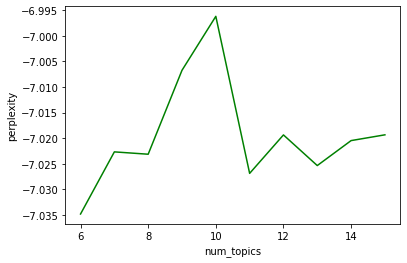

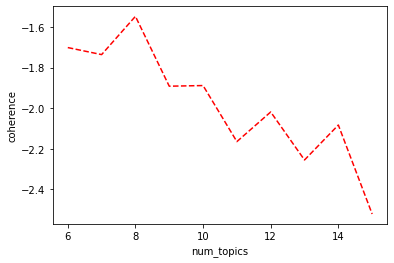

In [81]:
show_coherence(corpus, dictionary, start=6, end=15)

In [82]:
import os
import wget
import ssl

In [83]:
data_dir = 'data'
url = 'https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition_sampled.csv'
ssl._create_default_https_context = ssl._create_unverified_context

In [84]:
os.path.exists(data_dir)

False

In [85]:
if not os.path.exists(data_dir):
    os.mkdir(data_dir)

In [86]:
wget.download(url, data_dir)

'data/petition_sampled.csv'

In [87]:
import pandas as pd

In [88]:
df = pd.read_csv("./data/petition_sampled.csv")
df

,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...
...,...,...,...,...,...,...,...,...
18072,468520,2018-12-13,2019-01-12,0,9,정치개혁,자유당 의원정수 200명으로 줄이자,http://m.hani.co.kr/arti/politics/assembly/868...
18073,468529,2018-12-13,2019-01-12,0,48,외교/통일/국방,김정은 우상 숭배 단체 모두 처벌 청원...,솔직히 김정은이 남한에 온다고 특별히 달라지는 건 없지만...\n기약 없는 김정은의...
18074,468582,2018-12-13,2019-01-12,0,36,외교/통일/국방,외국인 배우자 초청 비자 불허한 영사 직권남용 규탄,주우즈베키스탄 담당 한국인 영사 정길수에게 여러 차례 전화를 시도를 하여도 연결이 ...
18075,468598,2018-12-13,2019-01-12,0,18,외교/통일/국방,남북통일 이루는것 보다 (박근혜.이명박) 전 대통령님 두 분 석방 통일을 시키는 것...,존경하는 문재인 대통령님\n남북통일을 빠르게 이루는 것 보다\n박근혜 전 대통령님과...


In [90]:
df.iloc[[2]]

,article_id,start,end,answered,votes,category,title,content
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...


In [92]:
df['category']

0             일자리
1            보건복지
2           육아/교육
3              기타
4        외교/통일/국방
           ...   
18072        정치개혁
18073    외교/통일/국방
18074    외교/통일/국방
18075    외교/통일/국방
18076    교통/건축/국토
Name: category, Length: 18077, dtype: object

In [93]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

In [94]:
twit = Okt()

In [95]:
def tokenizer(doc):
    return [token for token in twit.nouns(doc) if len(token) > 1]

In [96]:
vec = CountVectorizer(tokenizer=tokenizer, max_df=0.5, min_df=5, max_features=1000)

In [97]:
vec

CountVectorizer(max_df=0.5, max_features=1000, min_df=5,
                tokenizer=<function tokenizer at 0x0000014A10663760>)

In [98]:
pet_cv = vec.fit_transform(df.content)
pet_cv

<18077x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 459418 stored elements in Compressed Sparse Row format>

In [99]:
lda = LatentDirichletAllocation(n_components=15, n_jobs=-1, random_state=0)

In [100]:
pet_topics = lda.fit_transform(pet_cv)

In [101]:
pet_topics

array([[3.072e-04, 3.072e-04, 3.072e-04, ..., 3.072e-04, 3.072e-04,
        3.072e-04],
       [8.130e-04, 8.130e-04, 2.324e-01, ..., 8.130e-04, 8.130e-04,
        4.602e-01],
       [1.449e-03, 1.449e-03, 1.449e-03, ..., 1.449e-03, 1.449e-03,
        1.449e-03],
       ...,
       [6.246e-02, 6.539e-02, 6.944e-04, ..., 6.944e-04, 6.944e-04,
        1.519e-01],
       [3.030e-03, 7.967e-02, 3.030e-03, ..., 3.030e-03, 3.030e-03,
        3.030e-03],
       [7.576e-04, 3.366e-01, 7.576e-04, ..., 7.576e-04, 8.123e-02,
        3.860e-01]])

In [102]:
pet_topics.shape

(18077, 15)

In [103]:
lda.components_.shape

(15, 1000)

In [105]:
for i in lda.components_:
    print([vec.get_feature_names_out()[m] for m in (-i).argsort()[:10]])

['사람', '생각', '피해자', '처벌', '사건', '병원', '가해자', '자신', '피해', '환자']
['북한', '한국', '우리', '대통령', '정부', '미국', '대한민국', '국민', '일본', '국가']
['아이', '부모', '생각', '어린이집', '엄마', '교사', '우리', '유치원', '자녀', '가정']
['청소년', '불법', '보호', '폐지', '장애인', '조직', '사찰', '게임', '생각', '이용']
['국민', '대통령', '정부', '나라', '정책', '주택', '부동산', '서민', '사람', '지금']
['일자리', '기업', '정부', '근무', '생각', '근로자', '지원', '임금', '최저임금', '정책']
['국민', '청원', '국회의원', '국회', '의원', '생각', '반대', '청와대', '세금', '제도']
['대한', '관리', '내용', '조사', '판결', '관련', '공사', '업무', '판사', '사실']
['학생', '학교', '교육', '선수', '시험', '생각', '대학', '공부', '교사', '선생님']
['보험', '연금', '국민연금', '공무원', '지급', '방송', '국민', '소득', '가입', '의료']
['여성', '공무원', '사회', '남성', '생각', '의무', '남자', '대한민국', '여자', '행정']
['경찰', '범죄', '국민', '위해', '대한민국', '조직', '불법', '만행', '사건', '수사']
['차량', '사고', '처벌', '사건', '신고', '주차', '증거', '기사', '경우', '택시']
['민원', '화폐', '가상', '정부', '투자', '거래', '시장', '규제', '계획', '주식']
['사람', '지역', '회사', '저희', '대출', '생각', '미세먼지', '서울', '사용', '지금']


In [106]:
df['start']

0        2017-08-19
1        2017-08-20
2        2017-08-20
3        2017-08-20
4        2017-08-20
            ...    
18072    2018-12-13
18073    2018-12-13
18074    2018-12-13
18075    2018-12-13
18076    2018-12-13
Name: start, Length: 18077, dtype: object

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
from konlpy.tag import Okt

In [109]:
pet_topics.shape

(18077, 15)

In [110]:
trend_data = pd.DataFrame(pet_topics, columns=['Topic' + str(i) for i in range(1, 16)])
trend_data

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15
0,0.000307,0.000307,0.000307,0.060031,0.182109,0.000307,0.000307,0.754173,0.000307,0.000307,0.000307,0.000307,0.000307,0.000307,0.000307
1,0.000813,0.000813,0.232351,0.000813,0.000813,0.082254,0.000813,0.000813,0.000813,0.153684,0.063374,0.000813,0.000813,0.000813,0.460206
2,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.979710,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449
3,0.068723,0.630512,0.000227,0.000227,0.022403,0.245797,0.000227,0.000227,0.000227,0.000227,0.030297,0.000227,0.000227,0.000227,0.000227
4,0.065132,0.401455,0.000447,0.000447,0.000447,0.036019,0.267423,0.000447,0.000447,0.000447,0.225496,0.000447,0.000447,0.000447,0.000447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18072,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.533333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
18073,0.297230,0.593400,0.001235,0.001235,0.001235,0.001235,0.038725,0.001235,0.001235,0.001235,0.001235,0.057065,0.001235,0.001235,0.001235
18074,0.062460,0.065388,0.000694,0.000694,0.000694,0.000694,0.000694,0.712655,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.151858
18075,0.003030,0.079670,0.003030,0.003030,0.712259,0.003030,0.003030,0.003030,0.003030,0.003030,0.171708,0.003030,0.003030,0.003030,0.003030


In [112]:
df.start

0        2017-08-19
1        2017-08-20
2        2017-08-20
3        2017-08-20
4        2017-08-20
            ...    
18072    2018-12-13
18073    2018-12-13
18074    2018-12-13
18075    2018-12-13
18076    2018-12-13
Name: start, Length: 18077, dtype: object

In [113]:
df.start.map(lambda x: x[:7])

0        2017-08
1        2017-08
2        2017-08
3        2017-08
4        2017-08
          ...   
18072    2018-12
18073    2018-12
18074    2018-12
18075    2018-12
18076    2018-12
Name: start, Length: 18077, dtype: object

In [116]:
trend_data = pd.concat([trend_data, df.start.map(lambda x: x[:7])], axis=1)
trend_data

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,start
0,0.000307,0.000307,0.000307,0.060031,0.182109,0.000307,0.000307,0.754173,0.000307,0.000307,0.000307,0.000307,0.000307,0.000307,0.000307,2017-08
1,0.000813,0.000813,0.232351,0.000813,0.000813,0.082254,0.000813,0.000813,0.000813,0.153684,0.063374,0.000813,0.000813,0.000813,0.460206,2017-08
2,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,0.979710,0.001449,0.001449,0.001449,0.001449,0.001449,0.001449,2017-08
3,0.068723,0.630512,0.000227,0.000227,0.022403,0.245797,0.000227,0.000227,0.000227,0.000227,0.030297,0.000227,0.000227,0.000227,0.000227,2017-08
4,0.065132,0.401455,0.000447,0.000447,0.000447,0.036019,0.267423,0.000447,0.000447,0.000447,0.225496,0.000447,0.000447,0.000447,0.000447,2017-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18072,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.533333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,2018-12
18073,0.297230,0.593400,0.001235,0.001235,0.001235,0.001235,0.038725,0.001235,0.001235,0.001235,0.001235,0.057065,0.001235,0.001235,0.001235,2018-12
18074,0.062460,0.065388,0.000694,0.000694,0.000694,0.000694,0.000694,0.712655,0.000694,0.000694,0.000694,0.000694,0.000694,0.000694,0.151858,2018-12
18075,0.003030,0.079670,0.003030,0.003030,0.712259,0.003030,0.003030,0.003030,0.003030,0.003030,0.171708,0.003030,0.003030,0.003030,0.003030,2018-12


In [118]:
trend_data.iloc[:5, -5:]

,Topic12,Topic13,Topic14,Topic15,start
0,0.000307,0.000307,0.000307,0.000307,2017-08
1,0.000813,0.000813,0.000813,0.460206,2017-08
2,0.001449,0.001449,0.001449,0.001449,2017-08
3,0.000227,0.000227,0.000227,0.000227,2017-08
4,0.000447,0.000447,0.000447,0.000447,2017-08


In [126]:
trend = trend_data.groupby(['start']).mean()
trend

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15
start,,,,,,,,,,,,,,,
2017-08,0.072395,0.085190,0.155383,0.011511,0.073988,0.131014,0.033111,0.089559,0.095650,0.041555,0.031905,0.010507,0.036244,0.025885,0.106103
2017-09,0.157396,0.051371,0.088276,0.283778,0.038749,0.042630,0.051403,0.039727,0.054645,0.021613,0.042780,0.024993,0.037086,0.021294,0.044257
2017-10,0.105174,0.069594,0.065849,0.044064,0.066466,0.094951,0.053888,0.061396,0.081386,0.032258,0.089529,0.053818,0.050834,0.033566,0.097228
2017-11,0.111645,0.051717,0.043327,0.028646,0.068469,0.056141,0.093256,0.051793,0.065699,0.029746,0.046314,0.046327,0.216338,0.041019,0.049564
2017-12,0.111418,0.066582,0.067225,0.036150,0.081599,0.104353,0.082576,0.064020,0.073076,0.034563,0.056824,0.026315,0.066910,0.050224,0.078167
2018-01,0.084272,0.112432,0.034791,0.025797,0.149552,0.061698,0.075244,0.045516,0.054334,0.022180,0.046840,0.020513,0.038799,0.159961,0.068073
2018-02,0.111902,0.118100,0.043098,0.022961,0.088394,0.075646,0.105980,0.102990,0.076303,0.029386,0.057195,0.024745,0.048453,0.032588,0.062260
2018-03,0.117041,0.084364,0.054054,0.033160,0.065725,0.086575,0.085529,0.063564,0.062331,0.034588,0.090209,0.026620,0.062327,0.033493,0.100420
2018-04,0.108177,0.090252,0.052193,0.033233,0.085969,0.077626,0.101004,0.076078,0.053806,0.035517,0.046927,0.035235,0.049364,0.067202,0.087417


In [120]:
import matplotlib.pyplot as plt

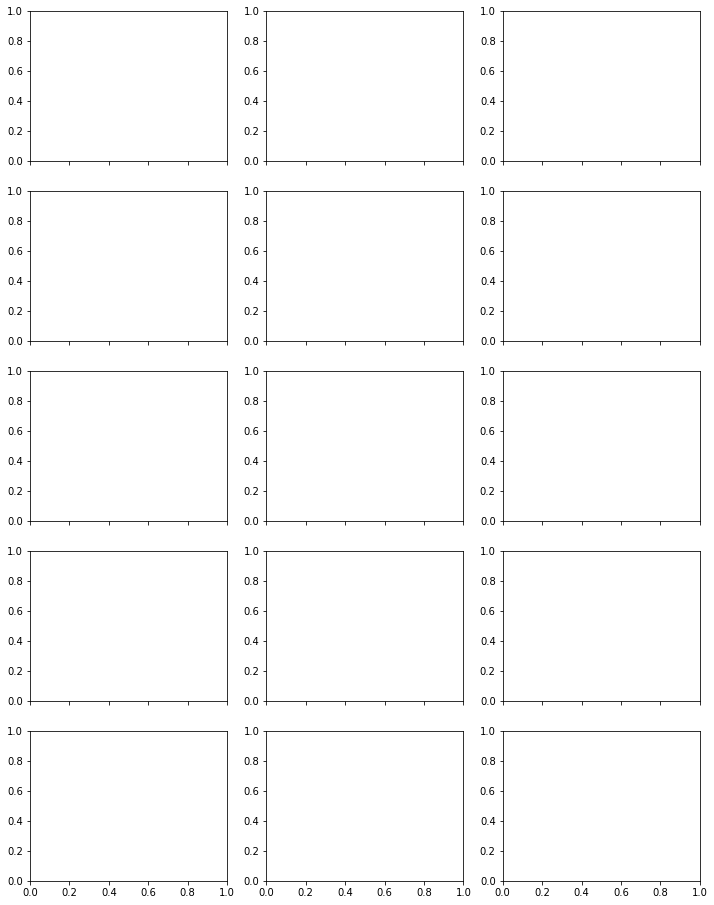

In [121]:
fig, axes = plt.subplots(5, 3, sharex='col', figsize=(12, 16))

In [127]:
trend.columns.tolist()

['Topic1',
 'Topic2',
 'Topic3',
 'Topic4',
 'Topic5',
 'Topic6',
 'Topic7',
 'Topic8',
 'Topic9',
 'Topic10',
 'Topic11',
 'Topic12',
 'Topic13',
 'Topic14',
 'Topic15']

In [125]:
axes.ravel()

array([<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
       <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >], dtype=object)

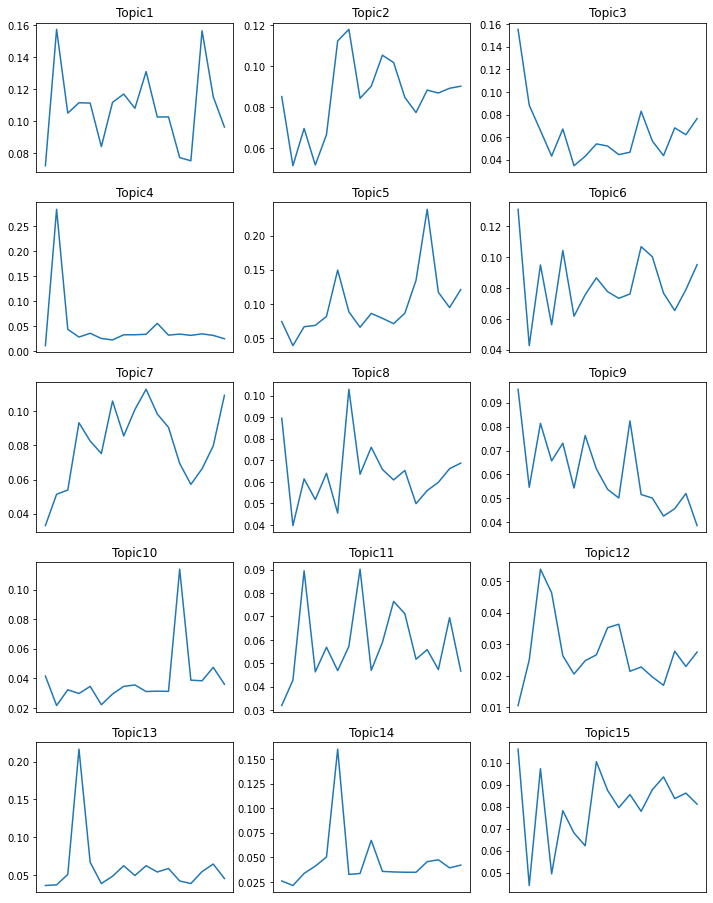

In [128]:
fig, axes = plt.subplots(5, 3, sharex='col', figsize=(12, 16)) 
for col, ax in zip(trend.columns.tolist(), axes.ravel()): 
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)
    ax.plot(trend[col])
plt.show()